Note: this analysis is for 0/0 and 0/1

## Get states for each work trajectory for G99L

In [30]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.new_topology, htf.new_positions(htf.hybrid_positions))
    modeller.deleteWater()
    new_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_new.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_new.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[0])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), new_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    traj = md.Trajectory(np.array(all_pos_reverse), new_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [5]:
outdir = "/data/chodera/zhangi/perses_benchmark/myb/0/1/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [6]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [10]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom.index, atom, atom.residue.id)

0 <Atom 0 (C) of chain 0 residue 0 (ACE)> 89
1 <Atom 1 (O) of chain 0 residue 0 (ACE)> 89
2 <Atom 2 (CH3) of chain 0 residue 0 (ACE)> 89
3 <Atom 3 (H1) of chain 0 residue 0 (ACE)> 89
4 <Atom 4 (H2) of chain 0 residue 0 (ACE)> 89
5 <Atom 5 (H3) of chain 0 residue 0 (ACE)> 89
6 <Atom 6 (N) of chain 0 residue 1 (LYS)> 90
7 <Atom 7 (CA) of chain 0 residue 1 (LYS)> 90
8 <Atom 8 (C) of chain 0 residue 1 (LYS)> 90
9 <Atom 9 (O) of chain 0 residue 1 (LYS)> 90
10 <Atom 10 (CB) of chain 0 residue 1 (LYS)> 90
11 <Atom 11 (CG) of chain 0 residue 1 (LYS)> 90
12 <Atom 12 (CD) of chain 0 residue 1 (LYS)> 90
13 <Atom 13 (CE) of chain 0 residue 1 (LYS)> 90
14 <Atom 14 (NZ) of chain 0 residue 1 (LYS)> 90
15 <Atom 15 (H) of chain 0 residue 1 (LYS)> 90
16 <Atom 16 (HA) of chain 0 residue 1 (LYS)> 90
17 <Atom 17 (HB2) of chain 0 residue 1 (LYS)> 90
18 <Atom 18 (HB3) of chain 0 residue 1 (LYS)> 90
19 <Atom 19 (HG2) of chain 0 residue 1 (LYS)> 90
20 <Atom 20 (HG3) of chain 0 residue 1 (LYS)> 90
21 <Atom 21 (

546 <Atom 546 (H1) of chain 1 residue 91 (HOH)> 92
547 <Atom 547 (H2) of chain 1 residue 91 (HOH)> 92
548 <Atom 548 (O) of chain 1 residue 92 (HOH)> 93
549 <Atom 549 (H1) of chain 1 residue 92 (HOH)> 93
550 <Atom 550 (H2) of chain 1 residue 92 (HOH)> 93
551 <Atom 551 (O) of chain 1 residue 93 (HOH)> 94
552 <Atom 552 (H1) of chain 1 residue 93 (HOH)> 94
553 <Atom 553 (H2) of chain 1 residue 93 (HOH)> 94
554 <Atom 554 (O) of chain 1 residue 94 (HOH)> 95
555 <Atom 555 (H1) of chain 1 residue 94 (HOH)> 95
556 <Atom 556 (H2) of chain 1 residue 94 (HOH)> 95
557 <Atom 557 (O) of chain 1 residue 95 (HOH)> 96
558 <Atom 558 (H1) of chain 1 residue 95 (HOH)> 96
559 <Atom 559 (H2) of chain 1 residue 95 (HOH)> 96
560 <Atom 560 (O) of chain 1 residue 96 (HOH)> 97
561 <Atom 561 (H1) of chain 1 residue 96 (HOH)> 97
562 <Atom 562 (H2) of chain 1 residue 96 (HOH)> 97
563 <Atom 563 (O) of chain 1 residue 97 (HOH)> 98
564 <Atom 564 (H1) of chain 1 residue 97 (HOH)> 98
565 <Atom 565 (H2) of chain 1 residue

1046 <Atom 1046 (O) of chain 1 residue 258 (HOH)> 259
1047 <Atom 1047 (H1) of chain 1 residue 258 (HOH)> 259
1048 <Atom 1048 (H2) of chain 1 residue 258 (HOH)> 259
1049 <Atom 1049 (O) of chain 1 residue 259 (HOH)> 260
1050 <Atom 1050 (H1) of chain 1 residue 259 (HOH)> 260
1051 <Atom 1051 (H2) of chain 1 residue 259 (HOH)> 260
1052 <Atom 1052 (O) of chain 1 residue 260 (HOH)> 261
1053 <Atom 1053 (H1) of chain 1 residue 260 (HOH)> 261
1054 <Atom 1054 (H2) of chain 1 residue 260 (HOH)> 261
1055 <Atom 1055 (O) of chain 1 residue 261 (HOH)> 262
1056 <Atom 1056 (H1) of chain 1 residue 261 (HOH)> 262
1057 <Atom 1057 (H2) of chain 1 residue 261 (HOH)> 262
1058 <Atom 1058 (O) of chain 1 residue 262 (HOH)> 263
1059 <Atom 1059 (H1) of chain 1 residue 262 (HOH)> 263
1060 <Atom 1060 (H2) of chain 1 residue 262 (HOH)> 263
1061 <Atom 1061 (O) of chain 1 residue 263 (HOH)> 264
1062 <Atom 1062 (H1) of chain 1 residue 263 (HOH)> 264
1063 <Atom 1063 (H2) of chain 1 residue 263 (HOH)> 264
1064 <Atom 1064 

1546 <Atom 1546 (H2) of chain 1 residue 424 (HOH)> 425
1547 <Atom 1547 (O) of chain 1 residue 425 (HOH)> 426
1548 <Atom 1548 (H1) of chain 1 residue 425 (HOH)> 426
1549 <Atom 1549 (H2) of chain 1 residue 425 (HOH)> 426
1550 <Atom 1550 (O) of chain 1 residue 426 (HOH)> 427
1551 <Atom 1551 (H1) of chain 1 residue 426 (HOH)> 427
1552 <Atom 1552 (H2) of chain 1 residue 426 (HOH)> 427
1553 <Atom 1553 (O) of chain 1 residue 427 (HOH)> 428
1554 <Atom 1554 (H1) of chain 1 residue 427 (HOH)> 428
1555 <Atom 1555 (H2) of chain 1 residue 427 (HOH)> 428
1556 <Atom 1556 (O) of chain 1 residue 428 (HOH)> 429
1557 <Atom 1557 (H1) of chain 1 residue 428 (HOH)> 429
1558 <Atom 1558 (H2) of chain 1 residue 428 (HOH)> 429
1559 <Atom 1559 (O) of chain 1 residue 429 (HOH)> 430
1560 <Atom 1560 (H1) of chain 1 residue 429 (HOH)> 430
1561 <Atom 1561 (H2) of chain 1 residue 429 (HOH)> 430
1562 <Atom 1562 (O) of chain 1 residue 430 (HOH)> 431
1563 <Atom 1563 (H1) of chain 1 residue 430 (HOH)> 431
1564 <Atom 1564 

2046 <Atom 2046 (H1) of chain 1 residue 591 (HOH)> 592
2047 <Atom 2047 (H2) of chain 1 residue 591 (HOH)> 592
2048 <Atom 2048 (O) of chain 1 residue 592 (HOH)> 593
2049 <Atom 2049 (H1) of chain 1 residue 592 (HOH)> 593
2050 <Atom 2050 (H2) of chain 1 residue 592 (HOH)> 593
2051 <Atom 2051 (O) of chain 1 residue 593 (HOH)> 594
2052 <Atom 2052 (H1) of chain 1 residue 593 (HOH)> 594
2053 <Atom 2053 (H2) of chain 1 residue 593 (HOH)> 594
2054 <Atom 2054 (O) of chain 1 residue 594 (HOH)> 595
2055 <Atom 2055 (H1) of chain 1 residue 594 (HOH)> 595
2056 <Atom 2056 (H2) of chain 1 residue 594 (HOH)> 595
2057 <Atom 2057 (O) of chain 1 residue 595 (HOH)> 596
2058 <Atom 2058 (H1) of chain 1 residue 595 (HOH)> 596
2059 <Atom 2059 (H2) of chain 1 residue 595 (HOH)> 596
2060 <Atom 2060 (O) of chain 1 residue 596 (HOH)> 597
2061 <Atom 2061 (H1) of chain 1 residue 596 (HOH)> 597
2062 <Atom 2062 (H2) of chain 1 residue 596 (HOH)> 597
2063 <Atom 2063 (O) of chain 1 residue 597 (HOH)> 598
2064 <Atom 2064 

2545 <Atom 2545 (H2) of chain 1 residue 757 (HOH)> 758
2546 <Atom 2546 (O) of chain 1 residue 758 (HOH)> 759
2547 <Atom 2547 (H1) of chain 1 residue 758 (HOH)> 759
2548 <Atom 2548 (H2) of chain 1 residue 758 (HOH)> 759
2549 <Atom 2549 (O) of chain 1 residue 759 (HOH)> 760
2550 <Atom 2550 (H1) of chain 1 residue 759 (HOH)> 760
2551 <Atom 2551 (H2) of chain 1 residue 759 (HOH)> 760
2552 <Atom 2552 (O) of chain 1 residue 760 (HOH)> 761
2553 <Atom 2553 (H1) of chain 1 residue 760 (HOH)> 761
2554 <Atom 2554 (H2) of chain 1 residue 760 (HOH)> 761
2555 <Atom 2555 (O) of chain 1 residue 761 (HOH)> 762
2556 <Atom 2556 (H1) of chain 1 residue 761 (HOH)> 762
2557 <Atom 2557 (H2) of chain 1 residue 761 (HOH)> 762
2558 <Atom 2558 (O) of chain 1 residue 762 (HOH)> 763
2559 <Atom 2559 (H1) of chain 1 residue 762 (HOH)> 763
2560 <Atom 2560 (H2) of chain 1 residue 762 (HOH)> 763
2561 <Atom 2561 (O) of chain 1 residue 763 (HOH)> 764
2562 <Atom 2562 (H1) of chain 1 residue 763 (HOH)> 764
2563 <Atom 2563 

3045 <Atom 3045 (H1) of chain 1 residue 924 (HOH)> 926
3046 <Atom 3046 (H2) of chain 1 residue 924 (HOH)> 926
3047 <Atom 3047 (O) of chain 1 residue 925 (HOH)> 927
3048 <Atom 3048 (H1) of chain 1 residue 925 (HOH)> 927
3049 <Atom 3049 (H2) of chain 1 residue 925 (HOH)> 927
3050 <Atom 3050 (O) of chain 1 residue 926 (HOH)> 928
3051 <Atom 3051 (H1) of chain 1 residue 926 (HOH)> 928
3052 <Atom 3052 (H2) of chain 1 residue 926 (HOH)> 928
3053 <Atom 3053 (O) of chain 1 residue 927 (HOH)> 929
3054 <Atom 3054 (H1) of chain 1 residue 927 (HOH)> 929
3055 <Atom 3055 (H2) of chain 1 residue 927 (HOH)> 929
3056 <Atom 3056 (O) of chain 1 residue 928 (HOH)> 930
3057 <Atom 3057 (H1) of chain 1 residue 928 (HOH)> 930
3058 <Atom 3058 (H2) of chain 1 residue 928 (HOH)> 930
3059 <Atom 3059 (O) of chain 1 residue 929 (HOH)> 931
3060 <Atom 3060 (H1) of chain 1 residue 929 (HOH)> 931
3061 <Atom 3061 (H2) of chain 1 residue 929 (HOH)> 931
3062 <Atom 3062 (O) of chain 1 residue 930 (HOH)> 932
3063 <Atom 3063 

3545 <Atom 3545 (O) of chain 1 residue 1091 (HOH)> 1097
3546 <Atom 3546 (H1) of chain 1 residue 1091 (HOH)> 1097
3547 <Atom 3547 (H2) of chain 1 residue 1091 (HOH)> 1097
3548 <Atom 3548 (O) of chain 1 residue 1092 (HOH)> 1098
3549 <Atom 3549 (H1) of chain 1 residue 1092 (HOH)> 1098
3550 <Atom 3550 (H2) of chain 1 residue 1092 (HOH)> 1098
3551 <Atom 3551 (O) of chain 1 residue 1093 (HOH)> 1099
3552 <Atom 3552 (H1) of chain 1 residue 1093 (HOH)> 1099
3553 <Atom 3553 (H2) of chain 1 residue 1093 (HOH)> 1099
3554 <Atom 3554 (O) of chain 1 residue 1094 (HOH)> 1100
3555 <Atom 3555 (H1) of chain 1 residue 1094 (HOH)> 1100
3556 <Atom 3556 (H2) of chain 1 residue 1094 (HOH)> 1100
3557 <Atom 3557 (O) of chain 1 residue 1095 (HOH)> 1101
3558 <Atom 3558 (H1) of chain 1 residue 1095 (HOH)> 1101
3559 <Atom 3559 (H2) of chain 1 residue 1095 (HOH)> 1101
3560 <Atom 3560 (O) of chain 1 residue 1096 (HOH)> 1102
3561 <Atom 3561 (H1) of chain 1 residue 1096 (HOH)> 1102
3562 <Atom 3562 (H2) of chain 1 resid

4045 <Atom 4045 (H2) of chain 1 residue 1257 (HOH)> 1263
4046 <Atom 4046 (O) of chain 1 residue 1258 (HOH)> 1264
4047 <Atom 4047 (H1) of chain 1 residue 1258 (HOH)> 1264
4048 <Atom 4048 (H2) of chain 1 residue 1258 (HOH)> 1264
4049 <Atom 4049 (O) of chain 1 residue 1259 (HOH)> 1265
4050 <Atom 4050 (H1) of chain 1 residue 1259 (HOH)> 1265
4051 <Atom 4051 (H2) of chain 1 residue 1259 (HOH)> 1265
4052 <Atom 4052 (O) of chain 1 residue 1260 (HOH)> 1266
4053 <Atom 4053 (H1) of chain 1 residue 1260 (HOH)> 1266
4054 <Atom 4054 (H2) of chain 1 residue 1260 (HOH)> 1266
4055 <Atom 4055 (O) of chain 1 residue 1261 (HOH)> 1267
4056 <Atom 4056 (H1) of chain 1 residue 1261 (HOH)> 1267
4057 <Atom 4057 (H2) of chain 1 residue 1261 (HOH)> 1267
4058 <Atom 4058 (O) of chain 1 residue 1262 (HOH)> 1268
4059 <Atom 4059 (H1) of chain 1 residue 1262 (HOH)> 1268
4060 <Atom 4060 (H2) of chain 1 residue 1262 (HOH)> 1268
4061 <Atom 4061 (O) of chain 1 residue 1263 (HOH)> 1269
4062 <Atom 4062 (H1) of chain 1 resid

4545 <Atom 4545 (H1) of chain 1 residue 1424 (HOH)> 1430
4546 <Atom 4546 (H2) of chain 1 residue 1424 (HOH)> 1430
4547 <Atom 4547 (O) of chain 1 residue 1425 (HOH)> 1431
4548 <Atom 4548 (H1) of chain 1 residue 1425 (HOH)> 1431
4549 <Atom 4549 (H2) of chain 1 residue 1425 (HOH)> 1431
4550 <Atom 4550 (O) of chain 1 residue 1426 (HOH)> 1432
4551 <Atom 4551 (H1) of chain 1 residue 1426 (HOH)> 1432
4552 <Atom 4552 (H2) of chain 1 residue 1426 (HOH)> 1432
4553 <Atom 4553 (O) of chain 1 residue 1427 (HOH)> 1433
4554 <Atom 4554 (H1) of chain 1 residue 1427 (HOH)> 1433
4555 <Atom 4555 (H2) of chain 1 residue 1427 (HOH)> 1433
4556 <Atom 4556 (O) of chain 1 residue 1428 (HOH)> 1434
4557 <Atom 4557 (H1) of chain 1 residue 1428 (HOH)> 1434
4558 <Atom 4558 (H2) of chain 1 residue 1428 (HOH)> 1434
4559 <Atom 4559 (O) of chain 1 residue 1429 (HOH)> 1435
4560 <Atom 4560 (H1) of chain 1 residue 1429 (HOH)> 1435
4561 <Atom 4561 (H2) of chain 1 residue 1429 (HOH)> 1435
4562 <Atom 4562 (O) of chain 1 resid

5045 <Atom 5045 (O) of chain 1 residue 1591 (HOH)> 1597
5046 <Atom 5046 (H1) of chain 1 residue 1591 (HOH)> 1597
5047 <Atom 5047 (H2) of chain 1 residue 1591 (HOH)> 1597
5048 <Atom 5048 (O) of chain 1 residue 1592 (HOH)> 1598
5049 <Atom 5049 (H1) of chain 1 residue 1592 (HOH)> 1598
5050 <Atom 5050 (H2) of chain 1 residue 1592 (HOH)> 1598
5051 <Atom 5051 (O) of chain 1 residue 1593 (HOH)> 1599
5052 <Atom 5052 (H1) of chain 1 residue 1593 (HOH)> 1599
5053 <Atom 5053 (H2) of chain 1 residue 1593 (HOH)> 1599
5054 <Atom 5054 (O) of chain 1 residue 1594 (HOH)> 1600
5055 <Atom 5055 (H1) of chain 1 residue 1594 (HOH)> 1600
5056 <Atom 5056 (H2) of chain 1 residue 1594 (HOH)> 1600
5057 <Atom 5057 (O) of chain 1 residue 1595 (HOH)> 1601
5058 <Atom 5058 (H1) of chain 1 residue 1595 (HOH)> 1601
5059 <Atom 5059 (H2) of chain 1 residue 1595 (HOH)> 1601
5060 <Atom 5060 (O) of chain 1 residue 1596 (HOH)> 1602
5061 <Atom 5061 (H1) of chain 1 residue 1596 (HOH)> 1602
5062 <Atom 5062 (H2) of chain 1 resid

5544 <Atom 5544 (H1) of chain 1 residue 1757 (HOH)> 1764
5545 <Atom 5545 (H2) of chain 1 residue 1757 (HOH)> 1764
5546 <Atom 5546 (O) of chain 1 residue 1758 (HOH)> 1765
5547 <Atom 5547 (H1) of chain 1 residue 1758 (HOH)> 1765
5548 <Atom 5548 (H2) of chain 1 residue 1758 (HOH)> 1765
5549 <Atom 5549 (O) of chain 1 residue 1759 (HOH)> 1766
5550 <Atom 5550 (H1) of chain 1 residue 1759 (HOH)> 1766
5551 <Atom 5551 (H2) of chain 1 residue 1759 (HOH)> 1766
5552 <Atom 5552 (O) of chain 1 residue 1760 (HOH)> 1767
5553 <Atom 5553 (H1) of chain 1 residue 1760 (HOH)> 1767
5554 <Atom 5554 (H2) of chain 1 residue 1760 (HOH)> 1767
5555 <Atom 5555 (O) of chain 1 residue 1761 (HOH)> 1768
5556 <Atom 5556 (H1) of chain 1 residue 1761 (HOH)> 1768
5557 <Atom 5557 (H2) of chain 1 residue 1761 (HOH)> 1768
5558 <Atom 5558 (O) of chain 1 residue 1762 (HOH)> 1769
5559 <Atom 5559 (H1) of chain 1 residue 1762 (HOH)> 1769
5560 <Atom 5560 (H2) of chain 1 residue 1762 (HOH)> 1769
5561 <Atom 5561 (O) of chain 1 resid

6044 <Atom 6044 (O) of chain 1 residue 1924 (HOH)> 1932
6045 <Atom 6045 (H1) of chain 1 residue 1924 (HOH)> 1932
6046 <Atom 6046 (H2) of chain 1 residue 1924 (HOH)> 1932
6047 <Atom 6047 (O) of chain 1 residue 1925 (HOH)> 1933
6048 <Atom 6048 (H1) of chain 1 residue 1925 (HOH)> 1933
6049 <Atom 6049 (H2) of chain 1 residue 1925 (HOH)> 1933
6050 <Atom 6050 (O) of chain 1 residue 1926 (HOH)> 1934
6051 <Atom 6051 (H1) of chain 1 residue 1926 (HOH)> 1934
6052 <Atom 6052 (H2) of chain 1 residue 1926 (HOH)> 1934
6053 <Atom 6053 (O) of chain 1 residue 1927 (HOH)> 1935
6054 <Atom 6054 (H1) of chain 1 residue 1927 (HOH)> 1935
6055 <Atom 6055 (H2) of chain 1 residue 1927 (HOH)> 1935
6056 <Atom 6056 (O) of chain 1 residue 1928 (HOH)> 1936
6057 <Atom 6057 (H1) of chain 1 residue 1928 (HOH)> 1936
6058 <Atom 6058 (H2) of chain 1 residue 1928 (HOH)> 1936
6059 <Atom 6059 (O) of chain 1 residue 1929 (HOH)> 1937
6060 <Atom 6060 (H1) of chain 1 residue 1929 (HOH)> 1937
6061 <Atom 6061 (H2) of chain 1 resid

6544 <Atom 6544 (H2) of chain 1 residue 2090 (HOH)> 2099
6545 <Atom 6545 (O) of chain 1 residue 2091 (HOH)> 2100
6546 <Atom 6546 (H1) of chain 1 residue 2091 (HOH)> 2100
6547 <Atom 6547 (H2) of chain 1 residue 2091 (HOH)> 2100
6548 <Atom 6548 (O) of chain 1 residue 2092 (HOH)> 2101
6549 <Atom 6549 (H1) of chain 1 residue 2092 (HOH)> 2101
6550 <Atom 6550 (H2) of chain 1 residue 2092 (HOH)> 2101
6551 <Atom 6551 (O) of chain 1 residue 2093 (HOH)> 2102
6552 <Atom 6552 (H1) of chain 1 residue 2093 (HOH)> 2102
6553 <Atom 6553 (H2) of chain 1 residue 2093 (HOH)> 2102
6554 <Atom 6554 (O) of chain 1 residue 2094 (HOH)> 2103
6555 <Atom 6555 (H1) of chain 1 residue 2094 (HOH)> 2103
6556 <Atom 6556 (H2) of chain 1 residue 2094 (HOH)> 2103
6557 <Atom 6557 (O) of chain 1 residue 2095 (HOH)> 2104
6558 <Atom 6558 (H1) of chain 1 residue 2095 (HOH)> 2104
6559 <Atom 6559 (H2) of chain 1 residue 2095 (HOH)> 2104
6560 <Atom 6560 (O) of chain 1 residue 2096 (HOH)> 2105
6561 <Atom 6561 (H1) of chain 1 resid

7044 <Atom 7044 (H1) of chain 1 residue 2257 (HOH)> 2267
7045 <Atom 7045 (H2) of chain 1 residue 2257 (HOH)> 2267
7046 <Atom 7046 (O) of chain 1 residue 2258 (HOH)> 2268
7047 <Atom 7047 (H1) of chain 1 residue 2258 (HOH)> 2268
7048 <Atom 7048 (H2) of chain 1 residue 2258 (HOH)> 2268
7049 <Atom 7049 (O) of chain 1 residue 2259 (HOH)> 2269
7050 <Atom 7050 (H1) of chain 1 residue 2259 (HOH)> 2269
7051 <Atom 7051 (H2) of chain 1 residue 2259 (HOH)> 2269
7052 <Atom 7052 (O) of chain 1 residue 2260 (HOH)> 2270
7053 <Atom 7053 (H1) of chain 1 residue 2260 (HOH)> 2270
7054 <Atom 7054 (H2) of chain 1 residue 2260 (HOH)> 2270
7055 <Atom 7055 (O) of chain 1 residue 2261 (HOH)> 2271
7056 <Atom 7056 (H1) of chain 1 residue 2261 (HOH)> 2271
7057 <Atom 7057 (H2) of chain 1 residue 2261 (HOH)> 2271
7058 <Atom 7058 (O) of chain 1 residue 2262 (HOH)> 2272
7059 <Atom 7059 (H1) of chain 1 residue 2262 (HOH)> 2272
7060 <Atom 7060 (H2) of chain 1 residue 2262 (HOH)> 2272
7061 <Atom 7061 (O) of chain 1 resid

7544 <Atom 7544 (O) of chain 1 residue 2424 (HOH)> 2435
7545 <Atom 7545 (H1) of chain 1 residue 2424 (HOH)> 2435
7546 <Atom 7546 (H2) of chain 1 residue 2424 (HOH)> 2435
7547 <Atom 7547 (O) of chain 1 residue 2425 (HOH)> 2436
7548 <Atom 7548 (H1) of chain 1 residue 2425 (HOH)> 2436
7549 <Atom 7549 (H2) of chain 1 residue 2425 (HOH)> 2436
7550 <Atom 7550 (O) of chain 1 residue 2426 (HOH)> 2437
7551 <Atom 7551 (H1) of chain 1 residue 2426 (HOH)> 2437
7552 <Atom 7552 (H2) of chain 1 residue 2426 (HOH)> 2437
7553 <Atom 7553 (O) of chain 1 residue 2427 (HOH)> 2438
7554 <Atom 7554 (H1) of chain 1 residue 2427 (HOH)> 2438
7555 <Atom 7555 (H2) of chain 1 residue 2427 (HOH)> 2438
7556 <Atom 7556 (O) of chain 1 residue 2428 (HOH)> 2439
7557 <Atom 7557 (H1) of chain 1 residue 2428 (HOH)> 2439
7558 <Atom 7558 (H2) of chain 1 residue 2428 (HOH)> 2439
7559 <Atom 7559 (O) of chain 1 residue 2429 (HOH)> 2440
7560 <Atom 7560 (H1) of chain 1 residue 2429 (HOH)> 2440
7561 <Atom 7561 (H2) of chain 1 resid

8044 <Atom 8044 (H2) of chain 1 residue 2590 (HOH)> 2603
8045 <Atom 8045 (O) of chain 1 residue 2591 (HOH)> 2604
8046 <Atom 8046 (H1) of chain 1 residue 2591 (HOH)> 2604
8047 <Atom 8047 (H2) of chain 1 residue 2591 (HOH)> 2604
8048 <Atom 8048 (O) of chain 1 residue 2592 (HOH)> 2605
8049 <Atom 8049 (H1) of chain 1 residue 2592 (HOH)> 2605
8050 <Atom 8050 (H2) of chain 1 residue 2592 (HOH)> 2605
8051 <Atom 8051 (O) of chain 1 residue 2593 (HOH)> 2606
8052 <Atom 8052 (H1) of chain 1 residue 2593 (HOH)> 2606
8053 <Atom 8053 (H2) of chain 1 residue 2593 (HOH)> 2606
8054 <Atom 8054 (O) of chain 1 residue 2594 (HOH)> 2607
8055 <Atom 8055 (H1) of chain 1 residue 2594 (HOH)> 2607
8056 <Atom 8056 (H2) of chain 1 residue 2594 (HOH)> 2607
8057 <Atom 8057 (O) of chain 1 residue 2595 (HOH)> 2608
8058 <Atom 8058 (H1) of chain 1 residue 2595 (HOH)> 2608
8059 <Atom 8059 (H2) of chain 1 residue 2595 (HOH)> 2608
8060 <Atom 8060 (O) of chain 1 residue 2596 (HOH)> 2609
8061 <Atom 8061 (H1) of chain 1 resid

8699 <Atom 8699 (O) of chain 1 residue 2809 (HOH)> 2825
8700 <Atom 8700 (H1) of chain 1 residue 2809 (HOH)> 2825
8701 <Atom 8701 (H2) of chain 1 residue 2809 (HOH)> 2825
8702 <Atom 8702 (O) of chain 1 residue 2810 (HOH)> 2826
8703 <Atom 8703 (H1) of chain 1 residue 2810 (HOH)> 2826
8704 <Atom 8704 (H2) of chain 1 residue 2810 (HOH)> 2826
8705 <Atom 8705 (O) of chain 1 residue 2811 (HOH)> 2827
8706 <Atom 8706 (H1) of chain 1 residue 2811 (HOH)> 2827
8707 <Atom 8707 (H2) of chain 1 residue 2811 (HOH)> 2827
8708 <Atom 8708 (O) of chain 1 residue 2812 (HOH)> 2828
8709 <Atom 8709 (H1) of chain 1 residue 2812 (HOH)> 2828
8710 <Atom 8710 (H2) of chain 1 residue 2812 (HOH)> 2828
8711 <Atom 8711 (O) of chain 1 residue 2813 (HOH)> 2829
8712 <Atom 8712 (H1) of chain 1 residue 2813 (HOH)> 2829
8713 <Atom 8713 (H2) of chain 1 residue 2813 (HOH)> 2829
8714 <Atom 8714 (O) of chain 1 residue 2814 (HOH)> 2830
8715 <Atom 8715 (H1) of chain 1 residue 2814 (HOH)> 2830
8716 <Atom 8716 (H2) of chain 1 resid

In [14]:
indices_old = []
indices_new = [180, 181, 186, 189]
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:01<00:00, 90.94it/s]

new files found: 100


#### Get dihedrals for complex

In [17]:
outdir = "/data/chodera/zhangi/perses_benchmark/myb/0/1/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [18]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [19]:
indices_old = []
indices_new = [180, 181, 186, 189]
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:13<00:00,  7.48it/s]


new files found: 100


In [20]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [21]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [31]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

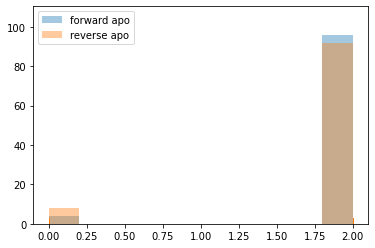

In [32]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

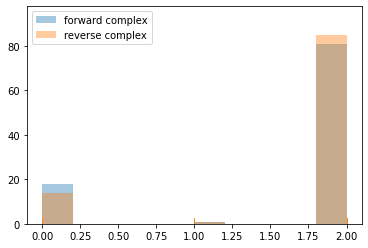

In [24]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

## Run estimator on G99L

In [25]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

INFO:numexpr.utils:Note: detected 72 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 72 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [26]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [27]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
titles = ["G99L"]
d_results = {}
d_phases = {}
first = 1
for i in tqdm_notebook([1]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/myb/0/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/myb/0/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/myb/0/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/myb/0/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


dir: 1
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250

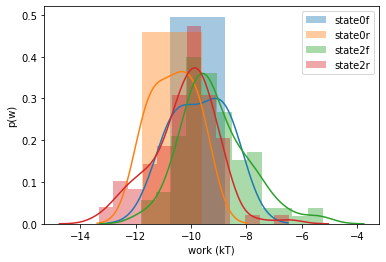

In [35]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

    # Plot work distributions
    for i in [0,2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

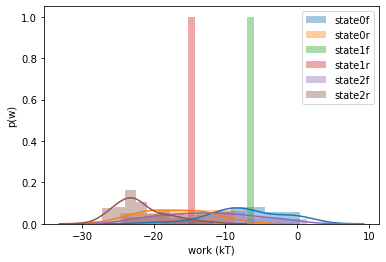

In [34]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [36]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(-energy)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['complex'] - d_dgs_phase['apo']

In [37]:
import tqdm
states_apo = [0, 2]
states_complex = [0, 2]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [04:24<00:00, 37.86it/s]


In [38]:
dgs_state_all_A42T = dgs_state_all

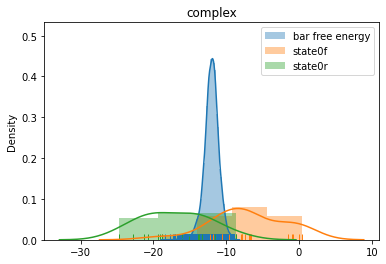

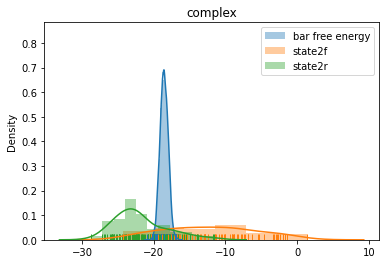

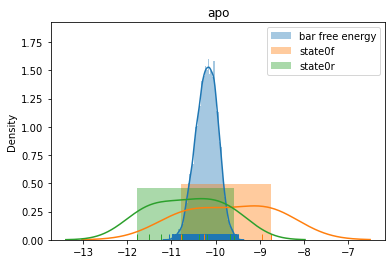

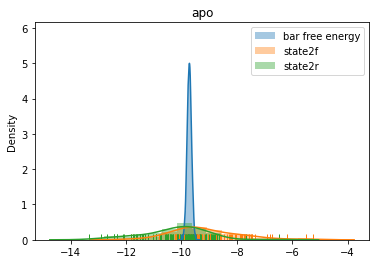

In [39]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

<AxesSubplot:ylabel='Density'>

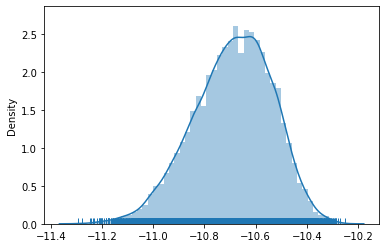

In [40]:
# Plot dgs for apo
dgs_apo = [d['apo'] for d in dgs_phase_all]
sns.distplot(dgs_apo, rug=True)

In [41]:
np.mean(dgs_apo)*KT_KCALMOL

-6.3727520099498465

In [42]:
np.std(dgs_apo)*KT_KCALMOL

0.09248720110940796

In [43]:
np.percentile(dgs_apo, 2.5)*KT_KCALMOL, np.percentile(dgs_apo, 97.5)*KT_KCALMOL

(-6.566330659239788, -6.210601232169849)

<AxesSubplot:ylabel='Density'>

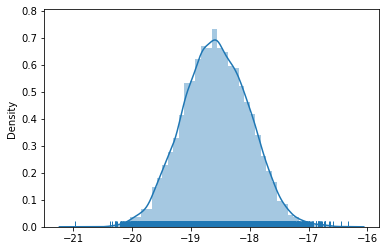

In [44]:
# Plot dgs for complex
dgs_complex = [d['complex'] for d in dgs_phase_all]
sns.distplot(dgs_complex, rug=True)

In [45]:
np.mean(dgs_complex)*KT_KCALMOL

-11.07119064466679

In [46]:
np.std(dgs_complex)*KT_KCALMOL

0.336094093069099

In [47]:
np.percentile(dgs_complex, 2.5)*KT_KCALMOL, np.percentile(dgs_complex, 97.5)*KT_KCALMOL

(-11.710200694834008, -10.417814675271723)

<AxesSubplot:ylabel='Density'>

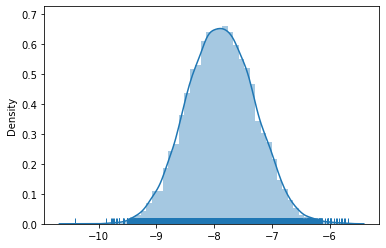

In [48]:
# Plot ddgs
sns.distplot(ddgs_all, rug=True)

In [49]:
np.mean(ddgs_all)*KT_KCALMOL 
# apo = [0, 1, 2] and complex [1, 2] -- -1.74 
# apo = [1, 2] and complex [1, 2] -- -1.74
# apo = [1, 2] and complex [1] -- 0.774
# apo = [1, 2] and complex [2] -- -1.74

-4.69843863471694

In [50]:
np.std(ddgs_all)*KT_KCALMOL

0.3481025806100736

In [51]:
np.percentile(ddgs_all, 2.5)*KT_KCALMOL, np.percentile(ddgs_all, 97.5)*KT_KCALMOL

(-5.37618781627073, -4.022197507683359)

## Get states for each work trajectory for L99G

In [52]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns


In [53]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.old_topology, htf.old_positions(htf.hybrid_positions))
    modeller.deleteWater()
    old_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_old.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[0])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_old.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), old_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    traj = md.Trajectory(np.array(all_pos_reverse), old_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [56]:
outdir = "/data/chodera/zhangi/perses_benchmark/myb/0/0/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [57]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [58]:
for atom in htf._topology_proposal.old_topology.atoms():
    print(atom, atom.residue.id)

<Atom 0 (C) of chain 0 residue 0 (ACE)> 89
<Atom 1 (O) of chain 0 residue 0 (ACE)> 89
<Atom 2 (CH3) of chain 0 residue 0 (ACE)> 89
<Atom 3 (H1) of chain 0 residue 0 (ACE)> 89
<Atom 4 (H2) of chain 0 residue 0 (ACE)> 89
<Atom 5 (H3) of chain 0 residue 0 (ACE)> 89
<Atom 6 (N) of chain 0 residue 1 (LYS)> 90
<Atom 7 (CA) of chain 0 residue 1 (LYS)> 90
<Atom 8 (C) of chain 0 residue 1 (LYS)> 90
<Atom 9 (O) of chain 0 residue 1 (LYS)> 90
<Atom 10 (CB) of chain 0 residue 1 (LYS)> 90
<Atom 11 (CG) of chain 0 residue 1 (LYS)> 90
<Atom 12 (CD) of chain 0 residue 1 (LYS)> 90
<Atom 13 (CE) of chain 0 residue 1 (LYS)> 90
<Atom 14 (NZ) of chain 0 residue 1 (LYS)> 90
<Atom 15 (H) of chain 0 residue 1 (LYS)> 90
<Atom 16 (HA) of chain 0 residue 1 (LYS)> 90
<Atom 17 (HB2) of chain 0 residue 1 (LYS)> 90
<Atom 18 (HB3) of chain 0 residue 1 (LYS)> 90
<Atom 19 (HG2) of chain 0 residue 1 (LYS)> 90
<Atom 20 (HG3) of chain 0 residue 1 (LYS)> 90
<Atom 21 (HD2) of chain 0 residue 1 (LYS)> 90
<Atom 22 (HD3) of ch

<Atom 954 (H1) of chain 1 residue 227 (HOH)> 229
<Atom 955 (H2) of chain 1 residue 227 (HOH)> 229
<Atom 956 (O) of chain 1 residue 228 (HOH)> 230
<Atom 957 (H1) of chain 1 residue 228 (HOH)> 230
<Atom 958 (H2) of chain 1 residue 228 (HOH)> 230
<Atom 959 (O) of chain 1 residue 229 (HOH)> 231
<Atom 960 (H1) of chain 1 residue 229 (HOH)> 231
<Atom 961 (H2) of chain 1 residue 229 (HOH)> 231
<Atom 962 (O) of chain 1 residue 230 (HOH)> 232
<Atom 963 (H1) of chain 1 residue 230 (HOH)> 232
<Atom 964 (H2) of chain 1 residue 230 (HOH)> 232
<Atom 965 (O) of chain 1 residue 231 (HOH)> 233
<Atom 966 (H1) of chain 1 residue 231 (HOH)> 233
<Atom 967 (H2) of chain 1 residue 231 (HOH)> 233
<Atom 968 (O) of chain 1 residue 232 (HOH)> 234
<Atom 969 (H1) of chain 1 residue 232 (HOH)> 234
<Atom 970 (H2) of chain 1 residue 232 (HOH)> 234
<Atom 971 (O) of chain 1 residue 233 (HOH)> 235
<Atom 972 (H1) of chain 1 residue 233 (HOH)> 235
<Atom 973 (H2) of chain 1 residue 233 (HOH)> 235
<Atom 974 (O) of chain 1 r

<Atom 1704 (H1) of chain 1 residue 477 (HOH)> 480
<Atom 1705 (H2) of chain 1 residue 477 (HOH)> 480
<Atom 1706 (O) of chain 1 residue 478 (HOH)> 481
<Atom 1707 (H1) of chain 1 residue 478 (HOH)> 481
<Atom 1708 (H2) of chain 1 residue 478 (HOH)> 481
<Atom 1709 (O) of chain 1 residue 479 (HOH)> 482
<Atom 1710 (H1) of chain 1 residue 479 (HOH)> 482
<Atom 1711 (H2) of chain 1 residue 479 (HOH)> 482
<Atom 1712 (O) of chain 1 residue 480 (HOH)> 483
<Atom 1713 (H1) of chain 1 residue 480 (HOH)> 483
<Atom 1714 (H2) of chain 1 residue 480 (HOH)> 483
<Atom 1715 (O) of chain 1 residue 481 (HOH)> 484
<Atom 1716 (H1) of chain 1 residue 481 (HOH)> 484
<Atom 1717 (H2) of chain 1 residue 481 (HOH)> 484
<Atom 1718 (O) of chain 1 residue 482 (HOH)> 485
<Atom 1719 (H1) of chain 1 residue 482 (HOH)> 485
<Atom 1720 (H2) of chain 1 residue 482 (HOH)> 485
<Atom 1721 (O) of chain 1 residue 483 (HOH)> 486
<Atom 1722 (H1) of chain 1 residue 483 (HOH)> 486
<Atom 1723 (H2) of chain 1 residue 483 (HOH)> 486
<Atom 

<Atom 2453 (O) of chain 1 residue 727 (HOH)> 731
<Atom 2454 (H1) of chain 1 residue 727 (HOH)> 731
<Atom 2455 (H2) of chain 1 residue 727 (HOH)> 731
<Atom 2456 (O) of chain 1 residue 728 (HOH)> 732
<Atom 2457 (H1) of chain 1 residue 728 (HOH)> 732
<Atom 2458 (H2) of chain 1 residue 728 (HOH)> 732
<Atom 2459 (O) of chain 1 residue 729 (HOH)> 733
<Atom 2460 (H1) of chain 1 residue 729 (HOH)> 733
<Atom 2461 (H2) of chain 1 residue 729 (HOH)> 733
<Atom 2462 (O) of chain 1 residue 730 (HOH)> 734
<Atom 2463 (H1) of chain 1 residue 730 (HOH)> 734
<Atom 2464 (H2) of chain 1 residue 730 (HOH)> 734
<Atom 2465 (O) of chain 1 residue 731 (HOH)> 735
<Atom 2466 (H1) of chain 1 residue 731 (HOH)> 735
<Atom 2467 (H2) of chain 1 residue 731 (HOH)> 735
<Atom 2468 (O) of chain 1 residue 732 (HOH)> 736
<Atom 2469 (H1) of chain 1 residue 732 (HOH)> 736
<Atom 2470 (H2) of chain 1 residue 732 (HOH)> 736
<Atom 2471 (O) of chain 1 residue 733 (HOH)> 737
<Atom 2472 (H1) of chain 1 residue 733 (HOH)> 737
<Atom 2

<Atom 3203 (O) of chain 1 residue 977 (HOH)> 982
<Atom 3204 (H1) of chain 1 residue 977 (HOH)> 982
<Atom 3205 (H2) of chain 1 residue 977 (HOH)> 982
<Atom 3206 (O) of chain 1 residue 978 (HOH)> 983
<Atom 3207 (H1) of chain 1 residue 978 (HOH)> 983
<Atom 3208 (H2) of chain 1 residue 978 (HOH)> 983
<Atom 3209 (O) of chain 1 residue 979 (HOH)> 984
<Atom 3210 (H1) of chain 1 residue 979 (HOH)> 984
<Atom 3211 (H2) of chain 1 residue 979 (HOH)> 984
<Atom 3212 (O) of chain 1 residue 980 (HOH)> 985
<Atom 3213 (H1) of chain 1 residue 980 (HOH)> 985
<Atom 3214 (H2) of chain 1 residue 980 (HOH)> 985
<Atom 3215 (O) of chain 1 residue 981 (HOH)> 986
<Atom 3216 (H1) of chain 1 residue 981 (HOH)> 986
<Atom 3217 (H2) of chain 1 residue 981 (HOH)> 986
<Atom 3218 (O) of chain 1 residue 982 (HOH)> 987
<Atom 3219 (H1) of chain 1 residue 982 (HOH)> 987
<Atom 3220 (H2) of chain 1 residue 982 (HOH)> 987
<Atom 3221 (O) of chain 1 residue 983 (HOH)> 988
<Atom 3222 (H1) of chain 1 residue 983 (HOH)> 988
<Atom 3

<Atom 3953 (O) of chain 1 residue 1227 (HOH)> 1233
<Atom 3954 (H1) of chain 1 residue 1227 (HOH)> 1233
<Atom 3955 (H2) of chain 1 residue 1227 (HOH)> 1233
<Atom 3956 (O) of chain 1 residue 1228 (HOH)> 1234
<Atom 3957 (H1) of chain 1 residue 1228 (HOH)> 1234
<Atom 3958 (H2) of chain 1 residue 1228 (HOH)> 1234
<Atom 3959 (O) of chain 1 residue 1229 (HOH)> 1235
<Atom 3960 (H1) of chain 1 residue 1229 (HOH)> 1235
<Atom 3961 (H2) of chain 1 residue 1229 (HOH)> 1235
<Atom 3962 (O) of chain 1 residue 1230 (HOH)> 1236
<Atom 3963 (H1) of chain 1 residue 1230 (HOH)> 1236
<Atom 3964 (H2) of chain 1 residue 1230 (HOH)> 1236
<Atom 3965 (O) of chain 1 residue 1231 (HOH)> 1237
<Atom 3966 (H1) of chain 1 residue 1231 (HOH)> 1237
<Atom 3967 (H2) of chain 1 residue 1231 (HOH)> 1237
<Atom 3968 (O) of chain 1 residue 1232 (HOH)> 1238
<Atom 3969 (H1) of chain 1 residue 1232 (HOH)> 1238
<Atom 3970 (H2) of chain 1 residue 1232 (HOH)> 1238
<Atom 3971 (O) of chain 1 residue 1233 (HOH)> 1239
<Atom 3972 (H1) of 

<Atom 4703 (O) of chain 1 residue 1477 (HOH)> 1484
<Atom 4704 (H1) of chain 1 residue 1477 (HOH)> 1484
<Atom 4705 (H2) of chain 1 residue 1477 (HOH)> 1484
<Atom 4706 (O) of chain 1 residue 1478 (HOH)> 1485
<Atom 4707 (H1) of chain 1 residue 1478 (HOH)> 1485
<Atom 4708 (H2) of chain 1 residue 1478 (HOH)> 1485
<Atom 4709 (O) of chain 1 residue 1479 (HOH)> 1486
<Atom 4710 (H1) of chain 1 residue 1479 (HOH)> 1486
<Atom 4711 (H2) of chain 1 residue 1479 (HOH)> 1486
<Atom 4712 (O) of chain 1 residue 1480 (HOH)> 1487
<Atom 4713 (H1) of chain 1 residue 1480 (HOH)> 1487
<Atom 4714 (H2) of chain 1 residue 1480 (HOH)> 1487
<Atom 4715 (O) of chain 1 residue 1481 (HOH)> 1488
<Atom 4716 (H1) of chain 1 residue 1481 (HOH)> 1488
<Atom 4717 (H2) of chain 1 residue 1481 (HOH)> 1488
<Atom 4718 (O) of chain 1 residue 1482 (HOH)> 1489
<Atom 4719 (H1) of chain 1 residue 1482 (HOH)> 1489
<Atom 4720 (H2) of chain 1 residue 1482 (HOH)> 1489
<Atom 4721 (O) of chain 1 residue 1483 (HOH)> 1490
<Atom 4722 (H1) of 

<Atom 5452 (H2) of chain 1 residue 1726 (HOH)> 1736
<Atom 5453 (O) of chain 1 residue 1727 (HOH)> 1737
<Atom 5454 (H1) of chain 1 residue 1727 (HOH)> 1737
<Atom 5455 (H2) of chain 1 residue 1727 (HOH)> 1737
<Atom 5456 (O) of chain 1 residue 1728 (HOH)> 1738
<Atom 5457 (H1) of chain 1 residue 1728 (HOH)> 1738
<Atom 5458 (H2) of chain 1 residue 1728 (HOH)> 1738
<Atom 5459 (O) of chain 1 residue 1729 (HOH)> 1739
<Atom 5460 (H1) of chain 1 residue 1729 (HOH)> 1739
<Atom 5461 (H2) of chain 1 residue 1729 (HOH)> 1739
<Atom 5462 (O) of chain 1 residue 1730 (HOH)> 1740
<Atom 5463 (H1) of chain 1 residue 1730 (HOH)> 1740
<Atom 5464 (H2) of chain 1 residue 1730 (HOH)> 1740
<Atom 5465 (O) of chain 1 residue 1731 (HOH)> 1741
<Atom 5466 (H1) of chain 1 residue 1731 (HOH)> 1741
<Atom 5467 (H2) of chain 1 residue 1731 (HOH)> 1741
<Atom 5468 (O) of chain 1 residue 1732 (HOH)> 1742
<Atom 5469 (H1) of chain 1 residue 1732 (HOH)> 1742
<Atom 5470 (H2) of chain 1 residue 1732 (HOH)> 1742
<Atom 5471 (O) of 

<Atom 6202 (H2) of chain 1 residue 1976 (HOH)> 1987
<Atom 6203 (O) of chain 1 residue 1977 (HOH)> 1988
<Atom 6204 (H1) of chain 1 residue 1977 (HOH)> 1988
<Atom 6205 (H2) of chain 1 residue 1977 (HOH)> 1988
<Atom 6206 (O) of chain 1 residue 1978 (HOH)> 1989
<Atom 6207 (H1) of chain 1 residue 1978 (HOH)> 1989
<Atom 6208 (H2) of chain 1 residue 1978 (HOH)> 1989
<Atom 6209 (O) of chain 1 residue 1979 (HOH)> 1990
<Atom 6210 (H1) of chain 1 residue 1979 (HOH)> 1990
<Atom 6211 (H2) of chain 1 residue 1979 (HOH)> 1990
<Atom 6212 (O) of chain 1 residue 1980 (HOH)> 1991
<Atom 6213 (H1) of chain 1 residue 1980 (HOH)> 1991
<Atom 6214 (H2) of chain 1 residue 1980 (HOH)> 1991
<Atom 6215 (O) of chain 1 residue 1981 (HOH)> 1992
<Atom 6216 (H1) of chain 1 residue 1981 (HOH)> 1992
<Atom 6217 (H2) of chain 1 residue 1981 (HOH)> 1992
<Atom 6218 (O) of chain 1 residue 1982 (HOH)> 1993
<Atom 6219 (H1) of chain 1 residue 1982 (HOH)> 1993
<Atom 6220 (H2) of chain 1 residue 1982 (HOH)> 1993
<Atom 6221 (O) of 

<Atom 6952 (H2) of chain 1 residue 2226 (HOH)> 2237
<Atom 6953 (O) of chain 1 residue 2227 (HOH)> 2238
<Atom 6954 (H1) of chain 1 residue 2227 (HOH)> 2238
<Atom 6955 (H2) of chain 1 residue 2227 (HOH)> 2238
<Atom 6956 (O) of chain 1 residue 2228 (HOH)> 2239
<Atom 6957 (H1) of chain 1 residue 2228 (HOH)> 2239
<Atom 6958 (H2) of chain 1 residue 2228 (HOH)> 2239
<Atom 6959 (O) of chain 1 residue 2229 (HOH)> 2240
<Atom 6960 (H1) of chain 1 residue 2229 (HOH)> 2240
<Atom 6961 (H2) of chain 1 residue 2229 (HOH)> 2240
<Atom 6962 (O) of chain 1 residue 2230 (HOH)> 2241
<Atom 6963 (H1) of chain 1 residue 2230 (HOH)> 2241
<Atom 6964 (H2) of chain 1 residue 2230 (HOH)> 2241
<Atom 6965 (O) of chain 1 residue 2231 (HOH)> 2242
<Atom 6966 (H1) of chain 1 residue 2231 (HOH)> 2242
<Atom 6967 (H2) of chain 1 residue 2231 (HOH)> 2242
<Atom 6968 (O) of chain 1 residue 2232 (HOH)> 2243
<Atom 6969 (H1) of chain 1 residue 2232 (HOH)> 2243
<Atom 6970 (H2) of chain 1 residue 2232 (HOH)> 2243
<Atom 6971 (O) of 

<Atom 7702 (H2) of chain 1 residue 2476 (HOH)> 2487
<Atom 7703 (O) of chain 1 residue 2477 (HOH)> 2488
<Atom 7704 (H1) of chain 1 residue 2477 (HOH)> 2488
<Atom 7705 (H2) of chain 1 residue 2477 (HOH)> 2488
<Atom 7706 (O) of chain 1 residue 2478 (HOH)> 2489
<Atom 7707 (H1) of chain 1 residue 2478 (HOH)> 2489
<Atom 7708 (H2) of chain 1 residue 2478 (HOH)> 2489
<Atom 7709 (O) of chain 1 residue 2479 (HOH)> 2490
<Atom 7710 (H1) of chain 1 residue 2479 (HOH)> 2490
<Atom 7711 (H2) of chain 1 residue 2479 (HOH)> 2490
<Atom 7712 (O) of chain 1 residue 2480 (HOH)> 2491
<Atom 7713 (H1) of chain 1 residue 2480 (HOH)> 2491
<Atom 7714 (H2) of chain 1 residue 2480 (HOH)> 2491
<Atom 7715 (O) of chain 1 residue 2481 (HOH)> 2492
<Atom 7716 (H1) of chain 1 residue 2481 (HOH)> 2492
<Atom 7717 (H2) of chain 1 residue 2481 (HOH)> 2492
<Atom 7718 (O) of chain 1 residue 2482 (HOH)> 2493
<Atom 7719 (H1) of chain 1 residue 2482 (HOH)> 2493
<Atom 7720 (H2) of chain 1 residue 2482 (HOH)> 2493
<Atom 7721 (O) of 

<Atom 8451 (H1) of chain 1 residue 2726 (HOH)> 2739
<Atom 8452 (H2) of chain 1 residue 2726 (HOH)> 2739
<Atom 8453 (O) of chain 1 residue 2727 (HOH)> 2740
<Atom 8454 (H1) of chain 1 residue 2727 (HOH)> 2740
<Atom 8455 (H2) of chain 1 residue 2727 (HOH)> 2740
<Atom 8456 (O) of chain 1 residue 2728 (HOH)> 2741
<Atom 8457 (H1) of chain 1 residue 2728 (HOH)> 2741
<Atom 8458 (H2) of chain 1 residue 2728 (HOH)> 2741
<Atom 8459 (O) of chain 1 residue 2729 (HOH)> 2742
<Atom 8460 (H1) of chain 1 residue 2729 (HOH)> 2742
<Atom 8461 (H2) of chain 1 residue 2729 (HOH)> 2742
<Atom 8462 (O) of chain 1 residue 2730 (HOH)> 2743
<Atom 8463 (H1) of chain 1 residue 2730 (HOH)> 2743
<Atom 8464 (H2) of chain 1 residue 2730 (HOH)> 2743
<Atom 8465 (O) of chain 1 residue 2731 (HOH)> 2744
<Atom 8466 (H1) of chain 1 residue 2731 (HOH)> 2744
<Atom 8467 (H2) of chain 1 residue 2731 (HOH)> 2744
<Atom 8468 (O) of chain 1 residue 2732 (HOH)> 2745
<Atom 8469 (H1) of chain 1 residue 2732 (HOH)> 2745
<Atom 8470 (H2) of

<Atom 9201 (H1) of chain 1 residue 2976 (HOH)> 2990
<Atom 9202 (H2) of chain 1 residue 2976 (HOH)> 2990
<Atom 9203 (O) of chain 1 residue 2977 (HOH)> 2991
<Atom 9204 (H1) of chain 1 residue 2977 (HOH)> 2991
<Atom 9205 (H2) of chain 1 residue 2977 (HOH)> 2991
<Atom 9206 (O) of chain 1 residue 2978 (HOH)> 2992
<Atom 9207 (H1) of chain 1 residue 2978 (HOH)> 2992
<Atom 9208 (H2) of chain 1 residue 2978 (HOH)> 2992
<Atom 9209 (O) of chain 1 residue 2979 (HOH)> 2993
<Atom 9210 (H1) of chain 1 residue 2979 (HOH)> 2993
<Atom 9211 (H2) of chain 1 residue 2979 (HOH)> 2993
<Atom 9212 (O) of chain 1 residue 2980 (HOH)> 2994
<Atom 9213 (H1) of chain 1 residue 2980 (HOH)> 2994
<Atom 9214 (H2) of chain 1 residue 2980 (HOH)> 2994
<Atom 9215 (O) of chain 1 residue 2981 (HOH)> 2995
<Atom 9216 (H1) of chain 1 residue 2981 (HOH)> 2995
<Atom 9217 (H2) of chain 1 residue 2981 (HOH)> 2995
<Atom 9218 (O) of chain 1 residue 2982 (HOH)> 2996
<Atom 9219 (H1) of chain 1 residue 2982 (HOH)> 2996
<Atom 9220 (H2) of

<Atom 10201 (H2) of chain 1 residue 3309 (HOH)> 3329
<Atom 10202 (O) of chain 1 residue 3310 (HOH)> 3330
<Atom 10203 (H1) of chain 1 residue 3310 (HOH)> 3330
<Atom 10204 (H2) of chain 1 residue 3310 (HOH)> 3330
<Atom 10205 (O) of chain 1 residue 3311 (HOH)> 3331
<Atom 10206 (H1) of chain 1 residue 3311 (HOH)> 3331
<Atom 10207 (H2) of chain 1 residue 3311 (HOH)> 3331
<Atom 10208 (O) of chain 1 residue 3312 (HOH)> 3332
<Atom 10209 (H1) of chain 1 residue 3312 (HOH)> 3332
<Atom 10210 (H2) of chain 1 residue 3312 (HOH)> 3332
<Atom 10211 (O) of chain 1 residue 3313 (HOH)> 3333
<Atom 10212 (H1) of chain 1 residue 3313 (HOH)> 3333
<Atom 10213 (H2) of chain 1 residue 3313 (HOH)> 3333
<Atom 10214 (O) of chain 1 residue 3314 (HOH)> 3334
<Atom 10215 (H1) of chain 1 residue 3314 (HOH)> 3334
<Atom 10216 (H2) of chain 1 residue 3314 (HOH)> 3334
<Atom 10217 (O) of chain 1 residue 3315 (HOH)> 3335
<Atom 10218 (H1) of chain 1 residue 3315 (HOH)> 3335
<Atom 10219 (H2) of chain 1 residue 3315 (HOH)> 3335

In [62]:
indices_old = [180, 181, 184, 185]
indices_new = []
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:01<00:00, 94.07it/s]

new files found: 100


#### Get dihedrals for complex

In [63]:
outdir = "/data/chodera/zhangi/perses_benchmark/myb/0/0/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [64]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [65]:
indices_old = [180, 181, 184, 185]
indices_new = []
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:13<00:00,  7.60it/s]


new files found: 100


In [66]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [67]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [68]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

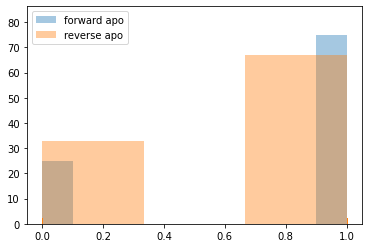

In [69]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

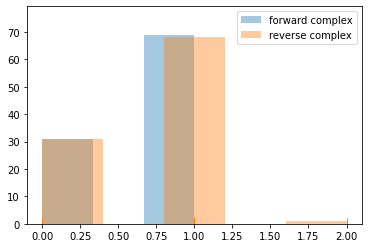

In [70]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

## Run estimator on T42A

In [71]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [72]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [74]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
titles = ["L99G"]
d_results = {}
d_phases = {}
first = 0
for i in tqdm_notebook([0]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/myb/0/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/myb/0/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/myb/0/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/myb/0/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


dir: 0
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250

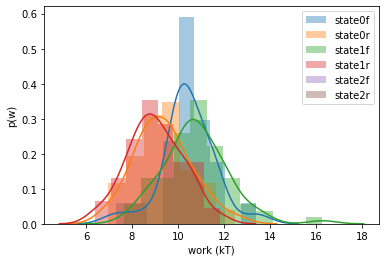

In [77]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

        
    # Plot work distributions
    for i in [0, 1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

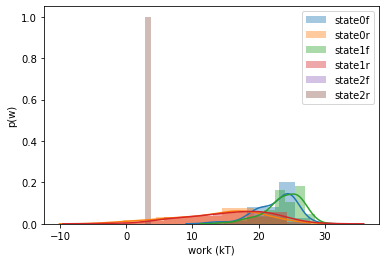

In [78]:
# Plot work distributions
plt.clf()
for i in [0, 1, 2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [79]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(energy) # Change to exp(-energy*-1)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['apo'] - d_dgs_phase['complex']

In [82]:
import tqdm
states_apo = [0, 1]
states_complex = [0, 1]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [04:15<00:00, 39.09it/s]


In [83]:
dgs_state_all_T42A = dgs_state_all

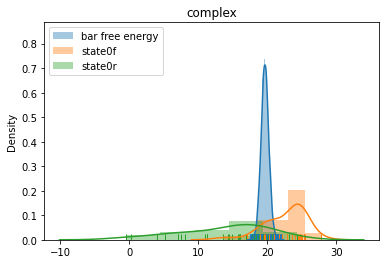

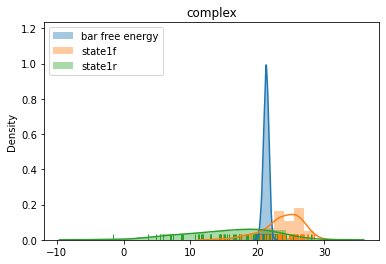

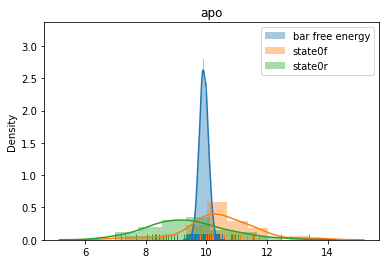

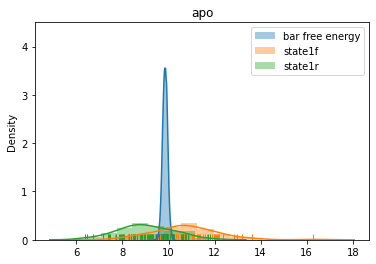

In [84]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

<AxesSubplot:ylabel='Density'>

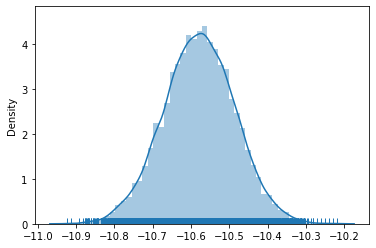

In [85]:
# Plot dgs for apo
dgs_apo = [d['apo'] for d in dgs_phase_all]
sns.distplot(dgs_apo, rug=True)

In [86]:
np.mean(dgs_apo)*KT_KCALMOL

-6.306797165831518

In [87]:
np.std(dgs_apo)*KT_KCALMOL

0.05553624019259626

In [88]:
np.percentile(dgs_apo, 2.5)*KT_KCALMOL, np.percentile(dgs_apo, 97.5)*KT_KCALMOL

(-6.417683572740467, -6.198124762289534)

<AxesSubplot:ylabel='Density'>

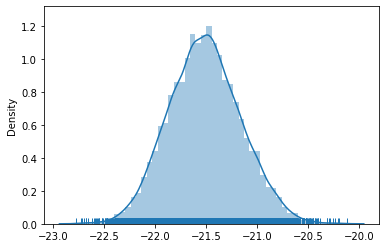

In [89]:
# Plot dgs for complex
dgs_complex = [d['complex'] for d in dgs_phase_all]
sns.distplot(dgs_complex, rug=True)

In [90]:
np.mean(dgs_complex)*KT_KCALMOL

-12.824612805333217

In [91]:
np.std(dgs_complex)*KT_KCALMOL

0.20969829368134596

In [92]:
np.percentile(dgs_complex, 2.5)*KT_KCALMOL, np.percentile(dgs_complex, 97.5)*KT_KCALMOL

(-13.222370393435332, -12.404167332034131)

<AxesSubplot:ylabel='Density'>

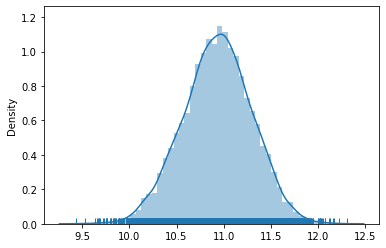

In [93]:
# Plot ddgs
sns.distplot(ddgs_all, rug=True)

In [94]:
np.mean(ddgs_all)*KT_KCALMOL

6.517815639501697

In [95]:
np.std(ddgs_all)*KT_KCALMOL

0.21771307873634943

In [96]:
np.percentile(ddgs_all, 2.5)*KT_KCALMOL, np.percentile(ddgs_all, 97.5)*KT_KCALMOL

(6.0787488493406805, 6.9291817958764925)

### Compare states L99G vs G99L

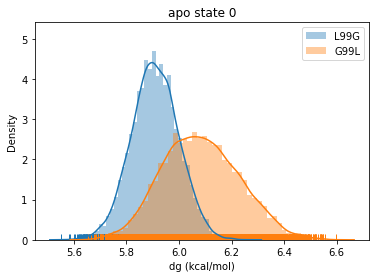

In [99]:
states = [0]
phases = ['apo']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(np.array(dgs_T42A)*KT_KCALMOL, label=f"L99G", rug=True)
        sns.distplot(np.array(dgs_A42T)*-KT_KCALMOL, label=f"G99L", rug=True)
        plt.title(f"{phase} state {state}")
        plt.legend()
        plt.xlabel("dg (kcal/mol)")
        plt.show()

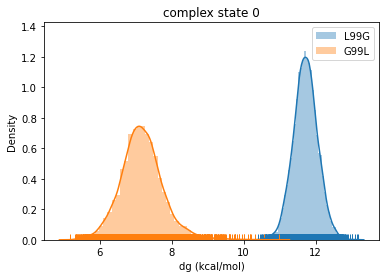

In [100]:
states = [0]
phases = ['complex']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(np.array(dgs_T42A)*KT_KCALMOL, label=f"L99G", rug=True)
        sns.distplot(np.array(dgs_A42T)*-KT_KCALMOL, label=f"G99L", rug=True)
        plt.title(f"{phase} state {state}")
        plt.legend()
        plt.xlabel("dg (kcal/mol)")
        plt.show()